In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

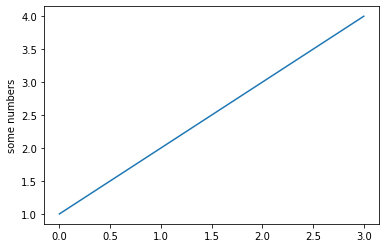

In [78]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

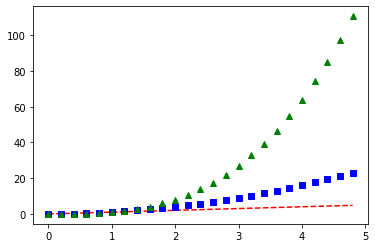

In [79]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

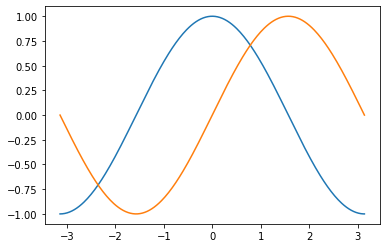

In [80]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

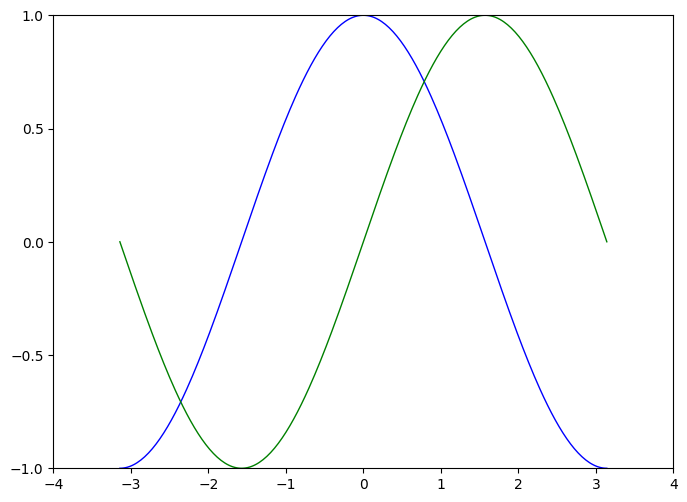

In [81]:
# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0,4.0)

# Set x ticks
plt.xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
plt.ylim(-1.0,1.0)

# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Show result on screen
plt.show()


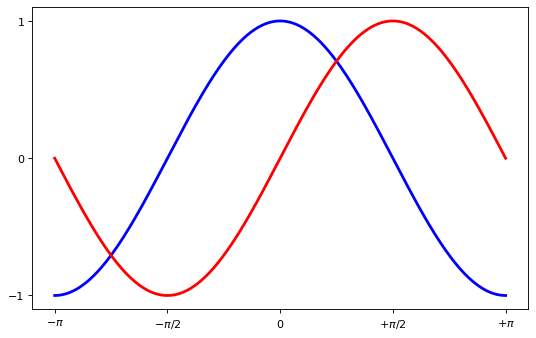

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1])

plt.show()

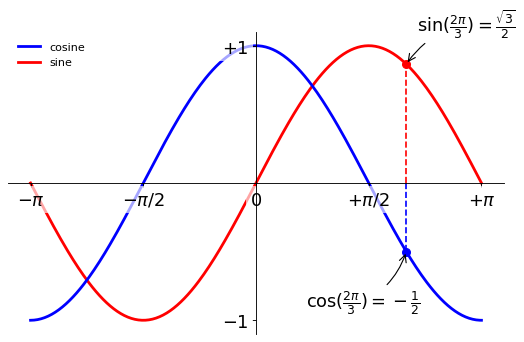

In [83]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine",
         zorder=-1)
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine",
         zorder=-2)


plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

plt.legend(loc='upper left', frameon=False)

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],
         color ='blue',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.show()

## Animation

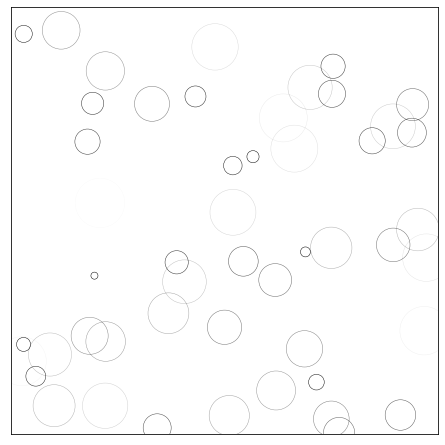

In [88]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# No toolbar
matplotlib.rcParams['toolbar'] = 'None'
matplotlib.rcParams['animation.html'] = 'html5'
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation = FuncAnimation(fig, update, interval=10)
from IPython.display import HTML
HTML(animation.to_html5_video())
# plt.show()


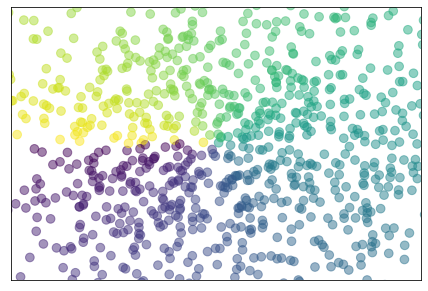

In [63]:
#Scatter Plots
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

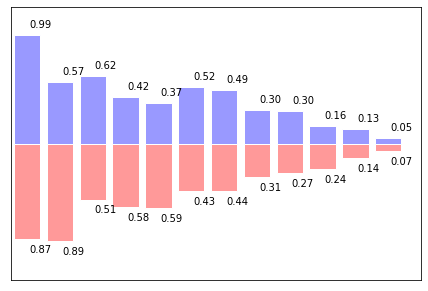

In [36]:
#Bar Plots
import numpy as np
import matplotlib.pyplot as plt

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.axes([0.025,0.025,0.95,0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.4, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1.25,+1.25), plt.yticks([])


plt.show()

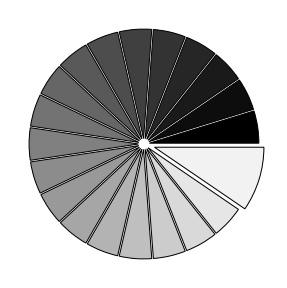

In [37]:
#Pie Charts
import numpy as np
import matplotlib.pyplot as plt

n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.pie(Z, explode=Z*.05, colors=['%f' % (i/float(n)) for i in range(n)],
        wedgeprops={"linewidth": 1, "edgecolor": "black"})
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])

# savefig('../figures/pie_ex.png',dpi=48)
plt.show()

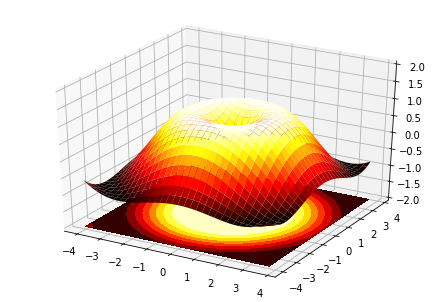

In [38]:
#3D Plots
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2,2)

# savefig('../figures/plot3d_ex.png',dpi=48)
plt.show()